In [2]:
from pkg.utils.utils_python3 import *
import random
import shutil
import os

DATA_PATH = "./data"
CONVERTED_PATH = "./data/converted"
SCENE_FILENAME = "scene.pkl"
JOINT_NUM = 13
gtimer = GlobalTimer()
# ## Load Global params
DATASET_LIST = sorted(os.listdir(CONVERTED_PATH))
trainset_num = None
if trainset_num is not None:
    TRAINSET_LIST =  DATASET_LIST[:trainset_num]
    TESTSET_LIST = DATASET_LIST[trainset_num:]
else:
    TRAINSET_LIST = ['20201214-165211', '20201216-021416', '20201218-024611']
    TESTSET_LIST = ['20201208-121454', '20201212-232318', '20201213-061207']
    #TRAINSET_LIST = ['20201221-020250']
    #TESTSET_LIST = ['20201220-222433']
    
# trainset
SCENE_TUPLE_LIST = []
for DATASET in TRAINSET_LIST:
    CURRENT_PATH = os.path.join(CONVERTED_PATH, DATASET)
    #Iterate world
    WORLD_LIST = sorted(filter(lambda x: not x.endswith(".json"), os.listdir(CURRENT_PATH)))
    gtimer.reset()
    for WORLD in WORLD_LIST:
        WORLD_PATH = os.path.join(CURRENT_PATH, WORLD)
        # Iterate scene
        SCENE_LIST = sorted(filter(lambda x: not x.endswith(".json"), os.listdir(WORLD_PATH)))
        for SCENE in SCENE_LIST:
            SCENE_PATH = os.path.join(WORLD_PATH, SCENE)
            ACTION_LIST = sorted(filter(lambda x: x != SCENE_FILENAME, os.listdir(SCENE_PATH)))
            for ACTION in ACTION_LIST:
                SCENE_TUPLE_LIST.append((CONVERTED_PATH, DATASET, WORLD, SCENE, ACTION, JOINT_NUM))
                    #gtimer.tic("load_scene_data")
                    #scene_data, success, skey = load_scene_data(CONVERTED_PATH, DATASET, WORLD, SCENE, ACTION, i_act, JOINT_NUM)
                    #gtimer.toc("load_scene_data")
train_set = SCENE_TUPLE_LIST
N_train = len(train_set)

# trainset
SCENE_TUPLE_LIST = []
for DATASET in TESTSET_LIST:
    CURRENT_PATH = os.path.join(CONVERTED_PATH, DATASET)
    #Iterate world
    WORLD_LIST = sorted(filter(lambda x: not x.endswith(".json"), os.listdir(CURRENT_PATH)))
    gtimer.reset()
    for WORLD in WORLD_LIST:
        WORLD_PATH = os.path.join(CURRENT_PATH, WORLD)
        # Iterate scene
        SCENE_LIST = sorted(filter(lambda x: not x.endswith(".json"), os.listdir(WORLD_PATH)))
        for SCENE in SCENE_LIST:
            SCENE_PATH = os.path.join(WORLD_PATH, SCENE)
            ACTION_LIST = sorted(filter(lambda x: x != SCENE_FILENAME, os.listdir(SCENE_PATH)))
            for ACTION in ACTION_LIST:
                SCENE_TUPLE_LIST.append((CONVERTED_PATH, DATASET, WORLD, SCENE, ACTION, JOINT_NUM))
                    #gtimer.tic("load_scene_data")
                    #scene_data, success, skey = load_scene_data(CONVERTED_PATH, DATASET, WORLD, SCENE, ACTION, i_act, JOINT_NUM)
                    #gtimer.toc("load_scene_data")
test_set = SCENE_TUPLE_LIST
N_test = len(test_set)
print(f'Train/Test: {N_train}, {N_test}')

Train/Test: 59522, 19215


In [12]:
joint_num = 13
N_vtx_box = 3*8
N_mask_box = 1
N_joint_box = joint_num
N_label_box = N_vtx_box+N_mask_box+N_joint_box
N_vtx_cyl = 3*2+1
N_mask_cyl = 1
N_joint_cyl = joint_num
N_label_cyl = N_vtx_cyl+N_mask_cyl+N_joint_cyl
N_vtx_init = 3*8
N_mask_init = 1
N_joint_init = joint_num
N_label_init = N_vtx_init+N_mask_init+N_joint_init
N_vtx_goal = 3*8
N_mask_goal = 1
N_joint_goal = joint_num
N_label_goal = N_vtx_goal+N_mask_goal+N_joint_goal
N_joint_label = 6*joint_num
N_cell_label = N_label_box+N_label_cyl+N_label_init+N_label_goal + N_joint_label
N_BEGIN_CYL = N_vtx_box+N_mask_box+N_joint_box
N_BEGIN_INIT = N_BEGIN_CYL+N_vtx_cyl+N_mask_cyl+N_joint_cyl
N_BEGIN_GOAL = N_BEGIN_INIT+N_vtx_init+N_mask_init+N_joint_init
N_BEGIN_JOINT = N_BEGIN_GOAL+N_label_goal
def separate_dat(scene_data, load_limits=True, get_difference=True):
    if load_limits:
        if get_difference:
            N_joint_limits = 2*JOINT_NUM
        else:
            N_joint_limits = 3*JOINT_NUM
    else:
        N_joint_limits = 0
    N_cell_label = N_label_box+N_label_cyl+N_label_init+N_label_goal \
                        + N_joint_label + N_joint_limits
            
    cbox = scene_data[:,:,:,:, :N_vtx_box]
    cbox_m = scene_data[:,:,:,:, N_vtx_box]
    cbox_j = scene_data[:,:,:,:, N_vtx_box+1:N_vtx_box+1+N_joint_box]
    ccyl = scene_data[:,:,:,:, N_BEGIN_CYL:N_BEGIN_CYL+N_vtx_cyl]
    ccyl_m = scene_data[:,:,:,:, N_BEGIN_CYL+N_vtx_cyl]
    ccyl_j = scene_data[:,:,:,:, N_BEGIN_CYL+N_vtx_cyl+1:N_BEGIN_CYL+N_vtx_cyl+1+N_joint_cyl]
    ibox = scene_data[:,:,:,:, N_BEGIN_INIT:N_BEGIN_INIT+N_vtx_box]
    ibox_m = scene_data[:,:,:,:, N_BEGIN_INIT+N_vtx_box]
    ibox_j = scene_data[:,:,:,:, N_BEGIN_INIT+N_vtx_box+1:N_BEGIN_INIT+N_vtx_box+1+N_joint_init]
    gbox = scene_data[:,:,:,:, N_BEGIN_GOAL:N_BEGIN_GOAL+N_vtx_box]
    gbox_m = scene_data[:,:,:,:, N_BEGIN_GOAL+N_vtx_box]
    gbox_j = scene_data[:,:,:,:, N_BEGIN_GOAL+N_vtx_box+1:N_BEGIN_GOAL+N_vtx_box+1+N_joint_goal]
    if load_limits and get_difference:
        jvals = scene_data[:,:,:,:,N_BEGIN_JOINT+N_joint_label: N_BEGIN_JOINT+N_joint_label+JOINT_NUM]
        joints = np.reshape(scene_data[:,:,:,:,N_BEGIN_JOINT: N_BEGIN_JOINT+N_joint_label], scene_data.shape[:4]+(-1,int(N_joint_label/JOINT_NUM)))
        joints = np.concatenate([joints,
                                 np.stack(
                                     [jvals - scene_data[:,:,:,:,-N_joint_limits:-N_joint_limits+JOINT_NUM],
                                                 scene_data[:,:,:,:,-N_joint_limits+JOINT_NUM:] - jvals], axis=-1)
                                ], axis=-1)
    else:
        joints = scene_data[:,:,:,:,N_BEGIN_JOINT:]
        joints = np.reshape(joints, scene_data.shape[:4]+(-1,int((N_joint_label+N_joint_limits)/JOINT_NUM)))
    cbox = np.concatenate([cbox, 
                           (joints*np.expand_dims(cbox_j, axis=-1)).reshape(scene_data.shape[:4]+(-1,))], 
                          axis=-1)
    ccyl = np.concatenate([ccyl, 
                           (joints*np.expand_dims(ccyl_j, axis=-1)).reshape(scene_data.shape[:4]+(-1,))], 
                          axis=-1)
    ibox = np.concatenate([ibox, 
                           (joints*np.expand_dims(ibox_j, axis=-1)).reshape(scene_data.shape[:4]+(-1,))], 
                          axis=-1)
    gbox = np.concatenate([gbox, 
                           (joints*np.expand_dims(gbox_j, axis=-1)).reshape(scene_data.shape[:4]+(-1,))], 
                          axis=-1)
    return (cbox, np.expand_dims(cbox_m, axis=-1), 
            ccyl, np.expand_dims(ccyl_m, axis=-1), 
            ibox, np.expand_dims(ibox_m, axis=-1), 
            gbox, np.expand_dims(gbox_m, axis=-1))

In [5]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers as KL
from tensorflow.keras import Model
import datetime
import matplotlib.pyplot as plt

In [7]:
MODEL_NAME = "20210108-202908/model_23"
logpath = os.path.join('logs','gradient_tape',MODEL_NAME)
model = tf.keras.models.load_model(logpath)
test_path = os.path.join(logpath, "test")
try: os.mkdir(test_path)
except: pass

## GradCAM

In [8]:
def decision_layer_call(model, x):
    self = model
    C1, C2, C3, C4, C5 = x
    training=False
    ## paste model's decision part below
    f1 = self.dens11(self.gp1(C1), training=training)
    f1 = self.dropout11(f1)
    f1 = self.dens12(f1, training=training)
    f1 = self.dropout12(f1)
    f2 = self.dens21(self.gp2(C2), training=training)
    f2 = self.dropout21(f2)
    f2 = self.dens22(f2, training=training)
    f2 = self.dropout22(f2)
    f3 = self.dens31(self.gp3(C3), training=training)
    f3 = self.dropout31(f3)
    f3 = self.dens32(f3, training=training)
    f3 = self.dropout32(f3)
    f4 = self.dens41(self.gp4(C4), training=training)
    f4 = self.dropout41(f4)
    f4 = self.dens42(f4, training=training)
    f4 = self.dropout42(f4)
    f5 = self.dens51(self.gp5(C5), training=training)
    f5 = self.dropout51(f5)
    f5 = self.dens52(f5, training=training)
    f5 = self.dropout52(f5)
    x = self.concat([f1,f2,f3,f4,f5])
    # x = f5
    x = self.dens_int1(x, training=training)
    x = self.dropout1(x, training=training)
    x = self.dens_int2(x, training=training)
    x = self.dropout2(x, training=training)
    x = self.dens_out(x)
    return x

def get_gradcam(loss, target_layer, colormap=cv2.COLORMAP_JET):
    output = target_layer[0]
    grads = tape.gradient(loss, target_layer)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1, 2))

    cam = np.ones(output.shape[:-1], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, :, i]

    # cam = cv2.resize(cam.numpy(), (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap_color = np.zeros(heatmap.shape+(3,), dtype=np.uint8)
    for i_h in range(heatmap.shape[0]):
        heatmap_color[i_h, :, :,:] = cv2.applyColorMap(np.uint8(255*heatmap[i_h, :, :]), colormap)

    return heatmap, heatmap_color

In [13]:
res_list = []
lb_list = []
for i_s, scene_tuple in enumerate(test_set):
    scene_data, success, skey = load_scene_data(*scene_tuple)
    inputs = separate_dat(np.array([scene_data], dtype=np.float32))
    inputs_tf = list(map(tf.constant, inputs))
    C1, C2, C3, C4, C5 = model.resnet(inputs_tf, training=False)
    for target_layer_name in ["C1", "C2", "C3", "C4", "C5"]:
        for target_label in [0,1]:
            target_layer = globals()[target_layer_name]
            with tf.GradientTape() as tape:
                tape.watch(target_layer)
                predictions = decision_layer_call(model, [C1, C2, C3, C4, C5])
                loss = predictions[:, target_label]
            colormap = cv2.COLORMAP_JET
            heatmap, heatmap_color = get_gradcam(loss, target_layer, colormap=colormap)
            colormap_ref = np.repeat(cv2.applyColorMap(np.arange(255,dtype=np.uint8), colormap), 50, axis=1)
            try_mkdir(os.path.join(test_path, scene_tuple[1]))
            try_mkdir(os.path.join(test_path, *scene_tuple[1:3]))
            try_mkdir(os.path.join(test_path, *scene_tuple[1:4]))
            save_json(
                os.path.join(os.path.join(test_path, *scene_tuple[1:4]), "{}_heatmap_{}_{}.json".format(i_s, target_layer_name, target_label)), 
                {"scene_tuple": scene_tuple, "heatmap": heatmap, "heatmap_color": heatmap_color, "label": success, "prediction": np.array(predictions[0])})
#     print("Prediction: {} ({})".format(np.array(predictions[0]).tolist(), success))
#             break
#         break
#     res_list.append(bool(predictions[0,1]>predictions[0,0]))
#     lb_list.append(success)
    if i_s%100==0:
        print("done: {}/{}".format(i_s, N_test), end = '\r')

LookupError: No gradient defined for operation 'activation_62/IdentityN' (op type: IdentityN)

In [178]:
def try_mkdir(path):
    try: os.mkdir(path)
    except: pass

In [179]:
scene_tuple[]

In [171]:
np.mean(np.equal(res_list, lb_list))*100

77.71028293110052

In [172]:
scene_tuple

('./data/converted',
 '20201213-061207',
 'WORLD-20201213-071318',
 'SCENE-20201213-071320',
 '20201213-071355.pkl',
 24,
 13)

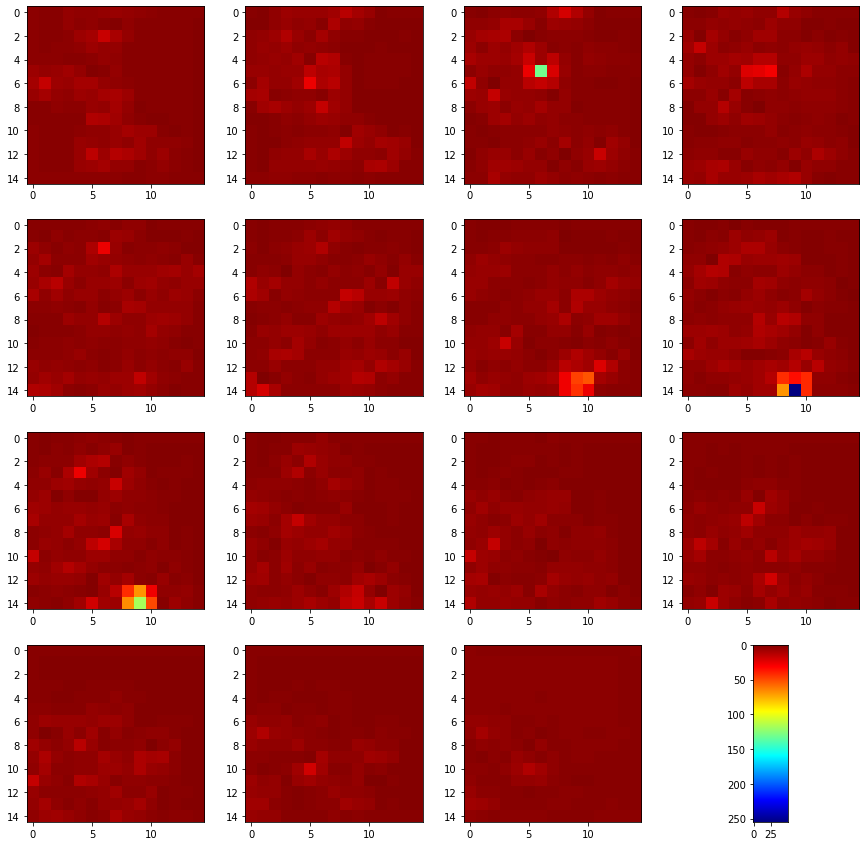

In [125]:
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(4,4,i+1)
    out=plt.imshow(heatmap_color[i])
plt.subplot(4,4,16)
out=plt.imshow(colormap_ref)

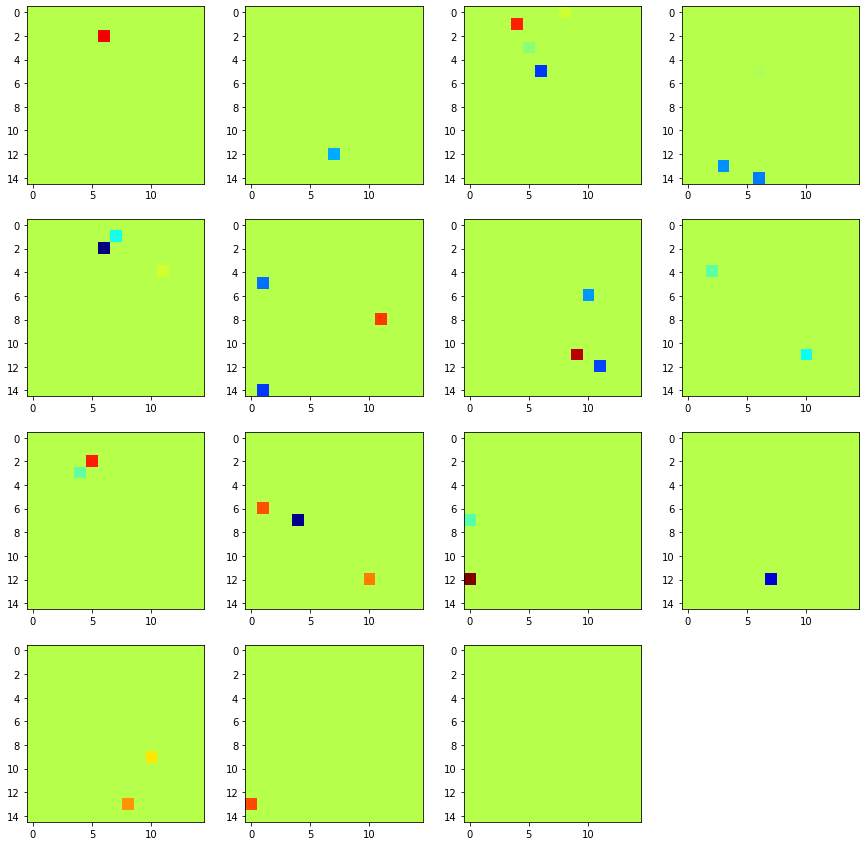

In [75]:
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(4,4,i+1)
    out=plt.imshow(heatmap_color[i])

In [13]:
BATCH_SIZE = 100
LOG_STEP = 100

## All cases

### full accuracy

In [9]:
test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    i_step += 1
    scene_batch.append(scene_data)
    success_batch.append(success)
    if i_step%BATCH_SIZE==0:
        cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
        test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
        scene_batch, success_batch = [], []
    if i_step%LOG_STEP==0:
        print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (18273): 77.71028137207031


### success/fail accuracy

In [10]:
test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Success Accuracy (6361): 65.2884750366211
Failure Accuracy (11912): 84.34351348876953


# Case study

In [5]:
def get_action_type(CONVERTED_PATH, DATASET, WORLD, SCENE, ACTION, idx_act, joint_num):
    action_data_dict = load_json(os.path.join(DATA_PATH, DATASET, WORLD, SCENE, ACTION.replace(".pkl", ".json")))
    if action_data_dict[str(idx_act)]['rname1'] and action_data_dict[str(idx_act)]['rname2']:
        atype = "handover"
    elif action_data_dict[str(idx_act)]['obj1']['collision']:
        atype = "place"
    elif action_data_dict[str(idx_act)]['obj2']['collision']:
        atype = "pick"
    else:
        raise(RuntimeError("Unexpected case"))
    return atype

## Pick cases

In [11]:
action_target = "pick"

test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (5459): 78.38432312011719
Success Accuracy (1794): 75.2508316040039
Failure Accuracy (3665): 79.91814422607422


## Place cases

In [12]:
action_target = "place"

test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (4248): 75.56497192382812
Success Accuracy (1338): 67.4887924194336
Failure Accuracy (2910): 79.27835083007812


## handover cases

In [13]:
action_target = "handover"

test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Full Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Success Accuracy ({i_step}): {test_accuracy.result() * 100}')


test_accuracy.reset_states()


i_step = 0
scene_batch, success_batch = [], []
for scene_tuple in test_set:
    scene_data, success, skey = load_scene_data(*scene_tuple)
    if not success and get_action_type(*scene_tuple)==action_target:
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%BATCH_SIZE==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
            print("test step - {}/{}        ".format(i_step, N_test), end = '\r')
if i_step%BATCH_SIZE!=0 and len(scene_batch)>0:
    cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
    test_step([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))


print(f'Failure Accuracy ({i_step}): {test_accuracy.result() * 100}')

Full Accuracy (8566): 78.14615631103516
Success Accuracy (3229): 69.80489349365234
Failure Accuracy (5337): 83.19281005859375


## Test times

In [10]:
from collections import defaultdict

In [20]:
batch_sizes = [4, 8, 12, 16, 24, 32, 64]

gtimer.reset()
for batch_size in batch_sizes:
    @tf.function
    def test_step_tmp(images, labels):
        predictions = model(images, training=False)
        return predictions

    i_step = 0
    scene_batch, success_batch = [], []
    batch_count = 0
    batch_count_max = 50
    for scene_tuple in test_set:
        scene_data, success, skey = load_scene_data(*scene_tuple)
        i_step += 1
        scene_batch.append(scene_data)
        success_batch.append(success)
        if i_step%batch_size==0:
            cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m = separate_dat(np.array(scene_batch, dtype=np.float32))
            if batch_count == 0:
                test_step_tmp([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            batch_count += 1
            gtimer.tic(str(batch_size))
            test_step_tmp([cbox, cbox_m, ccyl, ccyl_m, ibox, ibox_m, gbox, gbox_m], np.array(success_batch,dtype=np.int))
            gtimer.toc(str(batch_size), stack=True)
            if batch_count >= batch_count_max:
                break
            scene_batch, success_batch = [], []
        if i_step%LOG_STEP==0:
                print("test step - {}/{}        ".format(i_step, N_test), end = '\r')


    print(f'mean time ({batch_size}): {gtimer.time_dict[str(batch_size)] / gtimer.count_dict[str(batch_size)]/batch_size}')

mean time (4): 1.9545817375183105
mean time (8): 1.489320993423462
mean time (12): 1.1586602528889973
mean time (16): 1.0937497019767761
mean time (24): 1.1309679349263508
mean time (32): 2.2144901752471924
mean time (64): 2.1771758049726486


In [44]:
mean_times = []
min_times = []
max_times = []
std_times = []
batch_sizes_plot = batch_sizes[:-1]
for batch_size in batch_sizes_plot:
    timelist = gtimer.timelist_dict[str(batch_size)]
    mean_times.append(np.mean(timelist)/batch_size)
    min_times.append(np.min(timelist)/batch_size)
    max_times.append(np.max(timelist)/batch_size)
    std_times.append(np.std(timelist)/batch_size)

In [45]:
import matplotlib.pyplot as plt

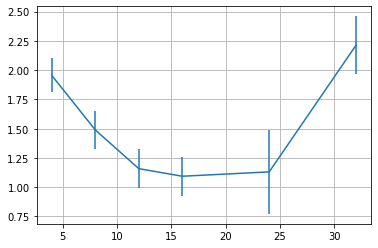

In [51]:
plt.errorbar(batch_sizes_plot, mean_times, std_times)
plt.grid()

In [55]:
batch_sizes_plot

[4, 8, 12, 16, 24, 32]

In [52]:
mean_times

[1.9545817375183105,
 1.489320993423462,
 1.1586602528889973,
 1.0937497019767761,
 1.1309679349263508,
 2.2144901752471924]

In [53]:
std_times

[0.14556603107133567,
 0.16431240084168167,
 0.16748516524169613,
 0.16637990088824536,
 0.359041183473676,
 0.24575944730035537]